$$\textbf{Optimización I. Tarea 4}$$
$$\textit{Y. Sarahi García Gozález}$$

$\color{purple}{Librerías \space }$ <br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import cholesky


In [2]:
print("Tarea realizada en MacOs. \nLas versiones de las librerías y de python utilizadas fueron:\n")
from platform import python_version
print("Python version", python_version())
print("Numpy version", np.__version__)

Tarea realizada en MacOs. 
Las versiones de las librerías y de python utilizadas fueron:

Python version 3.11.7
Numpy version 1.26.3


In [3]:
#imprimimos el epsilon de la máquina
epsilon = np.finfo(float).eps
print("Epsilon de la máquina:", epsilon)

Epsilon de la máquina: 2.220446049250313e-16


In [4]:
#definicion de funcion para para las graficas dee los contornos

def contornosFnc2D(fncf, puntos, xleft, xright, ybottom, ytop, levels):
    # Crea una discretización uniforme del intervalo [xleft, xright]
    ax = np.linspace(xleft, xright, 250)
    # Crea una discretización uniforme del intervalo [ybottom, ytop]
    ay = np.linspace(ybottom, ytop, 200)
    # La matriz mX que tiene las abscisas 
    mX, mY = np.meshgrid(ax, ay)
    # Se crea el arreglo mZ con los valores de la función en cada nodo
    mZ = mX.copy()
    for i, y in enumerate(ay):
        for j, x in enumerate(ax):
            mZ[i,j] = fncf(np.array([x, y]))
    # Grafica de las curvas de nivel
    fig, ax = plt.subplots()
    CS = ax.contourf(mX, mY, mZ, levels, cmap='coolwarm')
    plt.colorbar(CS, ax=ax)
    # Grafica los puntos dados
    puntos_x = [p[0] for p in puntos]
    puntos_y = [p[1] for p in puntos]
    ax.plot(puntos_x, puntos_y, 'r-',label="Sucesión")
    ax.plot(puntos_x[0], puntos_y[0], 'g*',label="punto inicial")
    ax.plot(puntos_x[-1], puntos_y[-1], 'b*',label="mínimo encontrado")
     # Grafica los puntos como puntos rojos
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Contornos de la función sucesión')
    plt.legend()
    plt.show()

$\color{purple}{Ejercicio \space 1}$ <br>

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$

Derivadas de primer orden:
$$\frac{d}{dx_1} f = 2 \left( 2x_1^3 + (2x_2 - 21)x_1 + x_2^2 - 7 \right)
$$

$$\frac{d}{dx_2} f = 2 \left( x_1^2 + x_2 + 2x_2(x_2^2 + x_1 - 7) - 11 \right)
$$
Derivadas de segundo orden:

$$\frac{d^2 }{dx^2_1}f= 12x_1^2 + 4x_2-42$$

$$\frac{d^2 }{dx^2_2}f= 12x_2^2 +4x_1 - 26$$

$$\frac{d^2 }{dx_1x_2}f=\frac{d^2 }{dx_2x_1}f= 4(x_1+x_2)$$

Hessiana:
\begin{align*}
\nabla^2 f(\mathbf{x}) &= \begin{bmatrix}
12x_1^2 + 4x_2-42&  & 4x_1 + 4x_2 \\
4x_1 + 4x_2 &  & 12x_2^2 +4x_1 - 26
\end{bmatrix}
\end{align*}

In [5]:
def Himmelblau(x):
    x1=x[0]
    x2=x[1]
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2


def D_Himmelblau(x):
    x1=x[0]
    x2=x[1]
    gx = 4*x1*(x1**2 + x2 - 11) + 2*(x1 + x2**2 - 7)
    gy = 2*(x1**2 + x2 - 11) + 4*x2*(x1 + x2**2 - 7)
    return np.array([gx, gy])

def H_Himmelblau(x):
    x1=x[0]
    x2=x[1]
    hessiana = np.array([[12*(x1**2) + 4*x2 - 42, 4*x1 + 4*x2],
                         [4*x1 + 4*x2, 12*(x2**2) + 4*x1 - 26]])
    return hessiana


**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$


Derivadas de primer orden:

$$\frac{d}{dx_1} f = 5.25x_2^3 + 4.5x_2^2 + 3x_2 + 2x_1(x_2^6 + x_2^4 - 2x_2^3 - x_2^2 - 2x_2 + 3) - 12.75
$$
$$\frac{d}{dx_2} f = x_1 \left(15.75x_2^2 + 9x_2 + x_1(6x_2^5 + x_2^3 - x_2^2 - 2x_2 - 2) + 3\right)
$$

Derivadas de segudo orden

$$\frac{d^2}{dx^2_1} f= 2(x_2^6 + x_2^4 - 2x_2^3 - x_2^2 - 2x_2 + 3)
$$

$$\frac{d^2}{dx^2_2} f= x_1 \left( 31.5x_2 + x_1(30x_2^4 + 3x_2^2 - 2x_2 - 2) + 9 \right)
$$

$$\frac{d^2}{dx_1x_2} =15.75x_2^2 + 9x_2 + 4x_1(3x_2^5 + 2x_2^3 - 3x_2^2 - x_2 - 1) + 3

$$



Hessiana
\begin{align*}
\nabla^2 f(\mathbf{x}) &= \begin{bmatrix}
2(x_2^6 + x_2^4 - 2x_2^3 - x_2^2 - 2x_2 + 3) & | & 15.75x_2^2 + 9x_2 + 4x_1(3x_2^5 + 2x_2^3 - 3x_2^2 - x_2 - 1) + 3 \\
15.75x_2^2 + 9x_2 + 4x_1(3x_2^5 + 2x_2^3 - 3x_2^2 - x_2 - 1) + 3 & | & x_1\left( 31.5x_2 + x_1(30x_2^4 + 3x_2^2 - 2x_2 - 2) + 9 \right)(x_1x_2^2 - x_1 + 2.25)
\end{bmatrix}
\end{align*}


In [6]:

def Beale(x):
    x1=x[0]
    x2=x[1]
    return (1.5 - x1 + x1*x2)**2 + (2.25 - x1 + x1*(x2**2))**2 + (2.625 - x1 + x1*(x2**3))**2

def D_Beale(x):
    x1=x[0]
    x2=x[1]    
    dx1 = 2*(1.5 - x1 + x1*x2)*(-1 + x2) + 2*(2.25 - x1 + x1*(x2**2))*(-1 + x2**2) + 2*(2.625 - x1 + x1*(x2**3))*(-1 + x2**3)
    dx2 = 2*(1.5 - (x[0]) + (x[0])*(x[1]))*((x[0])) + 2*(2.25 - (x[0]) + (x[0])*(x[1])**2)*(2*(x[0])*(x[1])) + 2*(2.625 - (x[0]) + (x[0])*(x[1])**3)*(3*(x[0])*(x[1])**2)
    return np.array([dx1, dx2])

def H_Beale(x):
    x1=x[0]
    x2=x[1] 
    d_x1x1 = 2 * (x2**6 + x2**4 - 2*x2**3 - x2**2 - 2*x2 + 3)
    d_x2x2 = x1 * (31.5*x2 + x1*(30*x2**4 + 3*x2**2 - 2*x2 - 2) + 9)
    d_x1x2 = 15.75*x2**2 + 9*x2 + 4*x1*(3*x2**5 + 2*x2**3 - 3*x2**2 - x2 - 1) + 3
    return [[d_x1x1, d_x1x2], [d_x1x2, d_x2x2]]

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$



In [7]:

def Rosenbrock(x):
    n = len(x)
    suma = 0
    for i in range(n-1):
        suma += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return suma

def D_Rosenbrock(x):
    n = len(x)
    gradient = np.zeros(n)
    for i in range(n-1):
        gradient[i] += -400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1 - x[i])
        gradient[i+1] += 200 * (x[i+1] - x[i]**2)
    return gradient

import numpy as np

def H_Rosenbrock(x):
    n = len(x)
    hessian = np.zeros((n, n))
    for i in range(n - 1):
        hessian[i, i] += 1200 * x[i]**2 - 400 * x[i + 1] + 2
        hessian[i, i + 1] += -400 * x[i]
        hessian[i + 1, i] += -400 * x[i]
        hessian[i + 1, i + 1] += 200
    return hessian

$$ f(\mathbf{x}) = -\frac{1}{1.94} \left[ 2.58 + 
\sum_{i=1}^{4} \alpha_i \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right)\right],$$
donde
$$ \alpha = (1.0, 1.2, 3.0, 3.2)$$
$$ \mathbf{A} = [a_{ij}] = \begin{bmatrix}
10   &   3 &   17 & 3.5 & 1.7 &  8 \\
0.05 &  10 &   17 & 0.1 & 8   & 14 \\
3    & 3.5 & 1.7  & 10  & 17  & 8  \\
17   & 8   & 0.05 & 10  & 0.1 & 14
\end{bmatrix}, \quad
\mathbf{P} = [p_{ij}] = 10^{-4} \begin{bmatrix}
1312 & 1696 & 5569 &  124 & 8283 & 5886 \\
2329 & 4135 & 8307 & 3736 & 1004 & 9991 \\
2348 & 1451 & 3522 & 2883 & 3047 & 6650 \\
4047 & 8828 & 8732 & 5743 & 1091 & 381
\end{bmatrix}.
$$ 


In [8]:
#definimos los parámetros de la funcion de hartman
alpha = np.array([1.0, 1.2, 3.0, 3.2])

A = np.array([[10, 3, 17, 3.5, 1.7, 8],
              [0.05, 10, 17, 0.1, 8, 14],
                [3, 3.5, 1.7, 10, 17, 8],
                [17, 8, 0.05, 10, 0.1, 14]])


P = 10**(-4) * np.array([[1312, 1696, 5569, 124, 8283, 5886],
                          [2329, 4135, 8307, 3736, 1004, 9991],
                          [2348, 1451, 3522, 2883, 3047, 6650],
                          [4047, 8828, 8732, 5743, 1091, 381]])

def Hartman(x):
    
    sum1=0
    for k in range(4):
        sum2=0
        for j in range(6):
            sum2+=A[k][j]*((x[j]-P[k][j])**2)
        sum1+= alpha[k]*np.exp(-sum2)/1.94
    
    return -(1/1.94)*(2.58 + sum1)

def D_Hartman(x):
    
    gradient=np.zeros(6)
    for i in range(6):
        sum1=0
        for k in range(4):
            sum2=0
            for j in range(6):
                sum2+=A[k][j]*((x[j]-P[k][j])**2)
            sum1+= 2*alpha[k]*A[k][i]*(x[i] - P[k][i])*np.exp(-sum2)/1.94
        gradient[i]=sum1
  
    return gradient

def H_Hartman(x):
    
    hessian=np.zeros([6,6])
    for i in range(6):
        for l in range(i, 6):
            sum1=0
            for k in range(4):
                sum2=0
                for j in range(6):
                    sum2+=A[k][j]*((x[j]-P[k][j])**2)
                sum1+=2*alpha[k]*A[k][i]*np.exp(-sum2)*(1-2*A[k][l]*(x[l]-P[k][l])*(x[i]-P[k][i]))/1.94
            hessian[i][l]=hessian[l][i]=sum1
        
    return hessian

$\color{purple}{Ejercicio \space 2}$ <br>

In [58]:
def newton_simple(Df,Hf,x0,tau,N):
    '''
    Esta función busca minimizar f aproximandola de manera cuadratica (a f), buscando 
    punto estacionario (generandoi una sucesion de ellos xk) y la direccion de descenso 
    se calcula resolviendo el sistema Hf*p=Df

    parametros: 
        (funciones) Gradiente f, Hessiana f
        (float) Valor inicial x0, tolerancia tau y máximo de iteraciones N

    returns:
        x_k: ultimo punto de la sucesión que genera el algoritmo
        k: número de iteraciones
        True/False: Indica si se satisfizo la condición de tolerancia
        x1,x2...xk: sucesión de puntos (np.array) or None 
    '''
    
    xk = x0
    n = len(xk)
    indicador=False

    if n==2:
        M = []
        M.append(xk)

    for k in range(N):
        gk = Df(xk)

        if np.linalg.norm(gk) < tau: #si se cumple la condición de tolerancia
            indicador=True #indicador verdadero 
            break #y rompemos el ciclo    

        hk = Hf(xk)
        pk = np.linalg.solve(hk, -gk) #resolvemos el sistema  para encontrar la direccion de Newton
        xk = xk + pk

        if n==2: #si la dimension es 2, guardamos los elementos de la suceison
            M.append(xk)

    if n == 2:
        return xk, indicador, k, M
    
    return xk, indicador, k, None


In [59]:
N = 1000 #iter maximas 

**Función de Himmelblau** 

-encontró el mínimo más cercano al punto inicial

It =  6
x_k       =  [3. 2.]
f(x_k)    =  7.394325848394185e-23
||gk||   =  6.757481991802896e-11
Sí se cumplio el criterio de convergencia


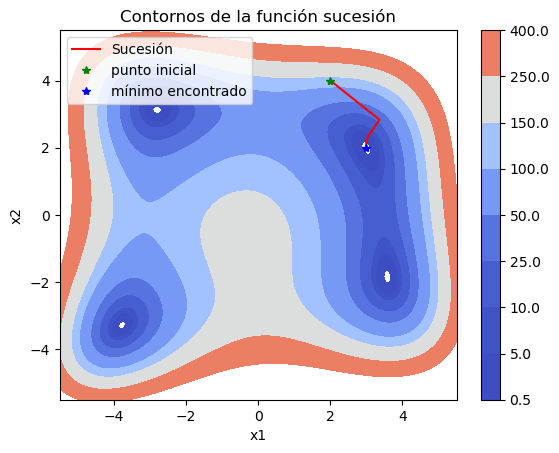

In [60]:
x0  = np.array([2,4])
n   = len(x0)
tau = np.sqrt(n* epsilon)

xk, indicador, k,m = newton_simple(D_Himmelblau,H_Himmelblau,x0,tau,N)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Himmelblau(xk))
print('||gk||   = ', np.linalg.norm(D_Himmelblau(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Himmelblau, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

**Función de Beale**

-No encuentra el mínimo

It =  10
x_k       =  [1.91762461e-13 1.00000000e+00]
f(x_k)    =  14.203125
||gk||   =  5.326831511367011e-12
Sí se cumplio el criterio de convergencia


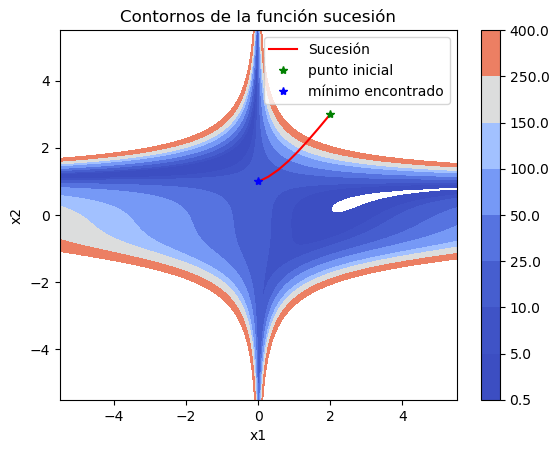

In [41]:
x0  = np.array([2,3])
n   = len(x0)
tau = np.sqrt(n* epsilon)

xk, indicador, k,m = newton_simple(D_Beale,H_Beale,x0,tau,N)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Beale(xk))
print('||gk||   = ', np.linalg.norm(D_Beale(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Beale, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

**Función de Rosenbrock**

-Encontró el mínimo en todos lo casos y en menos de 50 iteraciones (contrastante con los métodos anteriores que se llevaban miles)

It =  6
x_k       =  [1. 1.]
f(x_k)    =  3.4326461875363225e-20
||gk||   =  8.285705791275366e-09
Sí se cumplio el criterio de convergencia


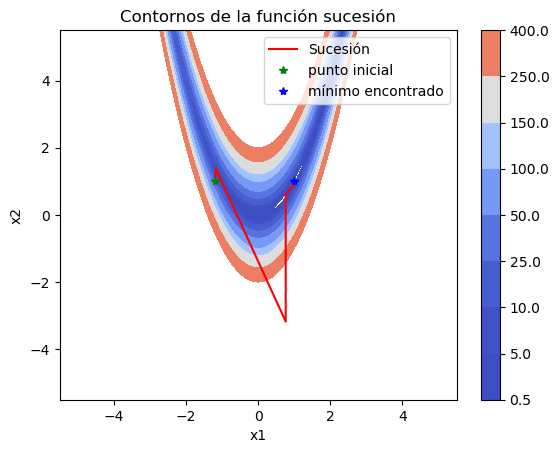

In [40]:
x0  = np.array([-1.2,1.0])
n   = len(x0)
tau = np.sqrt(n* epsilon) 

xk, indicador, k,m = newton_simple(D_Rosenbrock,H_Rosenbrock,x0,tau,N)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Rosenbrock, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

In [39]:
x0  = np.array([-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0])
n   = len(x0)
tau = np.sqrt(n* epsilon)

xk, indicador, k,m = newton_simple(D_Rosenbrock,H_Rosenbrock,x0,tau,N)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")



It =  34
x_k       =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
f(x_k)    =  4.2180922618088197e-26
||gk||   =  2.919209366833255e-13
Sí se cumplio el criterio de convergencia


In [38]:
x0  = np.array([-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0])
n   = len(x0)
tau = np.sqrt(n* epsilon) 

xk, indicador, k,m = newton_simple(D_Rosenbrock,H_Rosenbrock,x0,tau,N)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")

It =  46
x_k       =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
f(x_k)    =  2.1336222295899554e-29
||gk||   =  9.730292534480143e-14
Sí se cumplio el criterio de convergencia


**Función de Hartmann de dimensión 6**

-No encontró el mínimo global

In [37]:
x0  = np.array([0,0,0,0,0,0])
n   = len(x0)
tau = np.sqrt(n* epsilon) 

xk, indicador, k,m = newton_simple(D_Hartman,H_Hartman,x0,tau,N)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Hartman(xk))
print('||gk||   = ', np.linalg.norm(D_Hartman(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")


It =  10
x_k       =  [ 0.03641382  0.69048864 -0.37540698 -0.7162082  -0.48742814  0.56706182]
f(x_k)    =  -1.3298969077102802
||gk||   =  2.5065139422242908e-08
Sí se cumplio el criterio de convergencia


$\color{purple}{Ejercicio \space 3}$ <br>

In [62]:
def backtracking(alpha_ini,rho,c,x_k,f,f_k,df_k,p_k,iter_max):

    '''
        Esta funcion parte de un tamaño de paso inicial alpha_ini y lo va recortando hasta que
        cumple la cond de descenso suficiente

        parametros:
            valores (float): alpha_ini, rho entre (0,1), f(x_k), Df(x_k) (gradiente en el punto x_k), c_1, 
            direccion de descenso (np.rray): p_k 

        returns:
            el tamaño de paso a_k
            numero de iteraciones realizadas i_k
    '''

    alpha=alpha_ini #fijamos alpha como el alpha inicial
    gp=c*np.dot(df_k,p_k) #hacemos el producto gradiente por direccion de descenso p
    
    for i in range(iter_max):
        x_kp=x_k+alpha*p_k

        #si la condicion de descenso se cumple, terminamos
        if f(x_kp)<=(f_k + alpha*gp):
            return alpha,i,True

        alpha=alpha*rho #si no se cumple la cond, hacemos alpha*rho
        
    return  alpha,i,False




def newton_damped(f,Df,Hf,x0,tau,N,alpha_ini,rho,c,N2):
    '''
    Esta función busca minimizar f aproximandola de manera cuadratica (a f), buscando 
    punto estacionario (generando una sucesion de los xk) y la direccion de descenso 
    se calcula resolviendo el sistema Hf*p=Df asumiendo que Hf es definida positiva,
    si no lo es, se modifica hasta que sea lo suficiente def. positiva.

    parametros: 
        (funciones) Gradiente f, Hessiana f
        (float) Valor inicial x0, tolerancia tau y máximo de iteraciones N

    returns:
        x_k: ultimo punto de la sucesión que genera el algoritmo
        k: número de iteraciones
        True/False: Indica si se satisfizo la condición de tolerancia
        x1,x2...xk: sucesión de puntos (np.array) or None 
    '''



    xk = x0
    n = len(xk)
    indicador=False
    ak=alpha_ini

    if n==2:
        M = []
        M.append(xk)

    for k in range(N):
        dfk = Df(xk)

        if np.linalg.norm(dfk) < tau: #si se cumple la condición de tolerancia
            indicador=True #indicador verdadero 
            break #y rompemos el ciclo    
        
        
        hk = Hf(xk)
        pk = np.linalg.solve(hk, -dfk) #resolvemos el sistema  para encontrar la direccion de Newton# Resolviendo el sistema Ax=b usando la factorización de Cholesky#resolvemos el sistema  para encontrar la direccion de Newton
        
        if np.dot(dfk,pk)>0:
            pk=-pk
            
        fk=f(xk)
        ak,i,ind=backtracking(alpha_ini,rho,c,xk,f,fk,dfk,pk,N2)

        if not ind:
            print('Insuficientes iteraciones Backtracking', ak)

        xk=xk+(ak*pk)
        
        if n==2: #si la dimension es 2, guardamos los elementos de la suceison
            M.append(xk)

    if n == 2:
        return xk, indicador, k, M
    
    return xk, indicador, k, None


In [51]:
aini = 1.0 
rho  = 0.5 
c1   = 0.1
N    = 1000 #iter maximas para descenso
Nb   = 500 #iter maximas para backtracking

**Función de Himmelblau** 

-Encuentra el mínimo en el mismo númerode iteraciones que Newton simple

It =  6
x_k       =  [3. 2.]
f(x_k)    =  7.394325848394185e-23
||gk||   =  6.757481991802896e-11
Sí se cumplio el criterio de convergencia


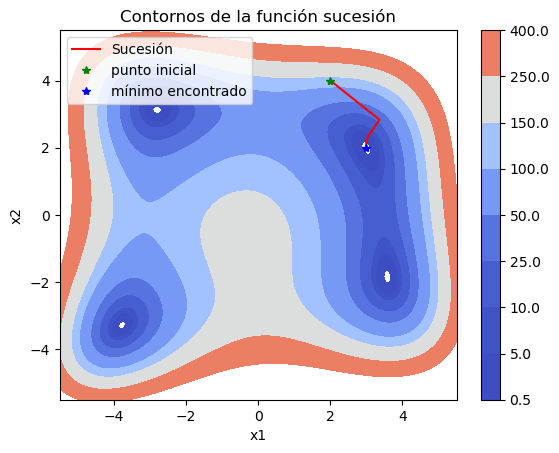

In [52]:
x0  = np.array([2,4])
n   = len(x0)
tau = np.sqrt(n* epsilon) 

xk, indicador, k,m = newton_damped(Himmelblau,D_Himmelblau,H_Himmelblau,x0,tau,N,aini,rho,c1,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Himmelblau(xk))
print('||gk||   = ', np.linalg.norm(D_Himmelblau(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Himmelblau, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

**Función de Beale**

-No encuentra el mínimo  y hace el mismo número de iteraciones que Newton simple

It =  10
x_k       =  [1.91762461e-13 1.00000000e+00]
f(x_k)    =  14.203125
||gk||   =  5.326831511367011e-12
Sí se cumplio el criterio de convergencia


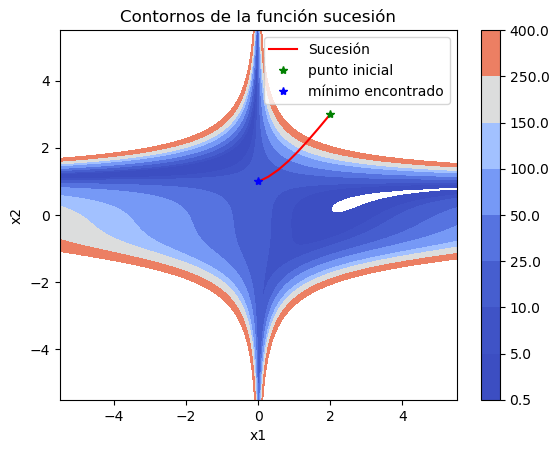

In [61]:
x0  = np.array([2,3])
n   = len(x0)
tau = np.sqrt(n*epsilon) 

xk, indicador, k,m = newton_damped(Beale,D_Beale,H_Beale,x0,tau,N,aini,rho,c1,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Beale(xk))
print('||gk||   = ', np.linalg.norm(D_Beale(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Beale, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

**Función de Rosenbrock**

En el caso en que x0 es un vector en R2, se ecuentra el mínimo pero en más el doble de iteraciones que Nweton simple.

Para los otros dos casos también se encuentra el mínimo y se requieren sólo dos iteraciones más

It =  15
x_k       =  [1. 1.]
f(x_k)    =  2.7235422752755433e-28
||gk||   =  3.251946148236627e-13
Sí se cumplio el criterio de convergencia


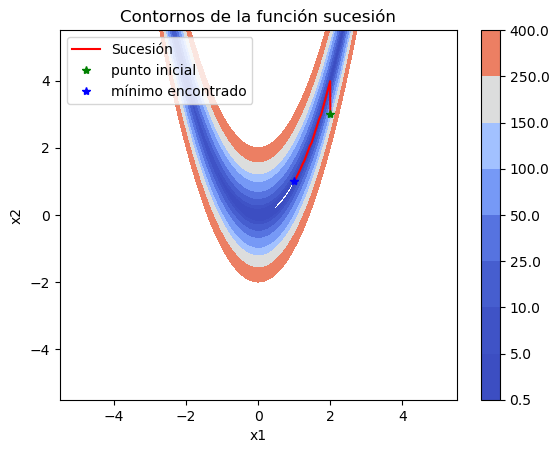

In [54]:
x0  = np.array([2,3])
n   = len(x0)
tau = np.sqrt(n*epsilon) 

xk, indicador, k,m = newton_damped(Rosenbrock,D_Rosenbrock,H_Rosenbrock,x0,tau,N,aini,rho,c1,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Rosenbrock, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

In [55]:
x0  =  np.array([-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0])
n   = len(x0)
tau = np.sqrt(n*epsilon) 

xk, indicador, k,m = newton_damped(Rosenbrock,D_Rosenbrock,H_Rosenbrock,x0,tau,N,aini,rho,c1,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")



It =  38
x_k       =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
f(x_k)    =  9.31431366843056e-26
||gk||   =  6.063324945599207e-12
Sí se cumplio el criterio de convergencia


In [57]:
x0  =  np.array([-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0])
n   = len(x0)
tau = np.sqrt(n*epsilon) 

xk, indicador, k,m = newton_damped(Rosenbrock,D_Rosenbrock,H_Rosenbrock,x0,tau,N,aini,rho,c1,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")


It =  48
x_k       =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
f(x_k)    =  4.528099412380451e-18
||gk||   =  5.1789930064303406e-08
Sí se cumplio el criterio de convergencia


**Función de Hartmann de dimensión 6**

In [66]:
x0  = np.array([0,0,0,0,0,0])
n   = len(x0)
tau = np.sqrt(n* epsilon) 

xk, indicador, k,m = newton_damped(Hartman,D_Hartman,H_Hartman,x0,tau,N,aini,rho,c1,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Hartman(xk))
print('||gk||   = ', np.linalg.norm(D_Hartman(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")

It =  999
x_k       =  [0.18058739 0.10143208 0.28232683 0.2513894  0.28032423 0.62060194]
f(x_k)    =  -2.11280666348733
||gk||   =  2.2396658103537397


$\color{purple}{Ejercicio \space 4}$ <br>

In [67]:
def positive_definite(A):
    '''
    Esta función determina si una matriz es definida positiva

    Parametros: (numpy.ndarray) Matriz A

    Returns: True (es definida positiva) / False (caso contrario)
    '''
    try:
        L=cholesky(A)
    except np.linalg.LinAlgError:
        print("La matriz no es definida positiva")
        return False, None
    
    return True, L


def newton_hessian_modification(f,Df,Hf,x0,tau,delta,N,alpha_ini,rho,c,N2):
    '''
    Esta función busca minimizar f aproximandola de manera cuadratica (a f), buscando 
    punto estacionario (generando una sucesion de los xk) y la direccion de descenso 
    se calcula resolviendo el sistema Hf*p=Df asumiendo que Hf es definida positiva,
    si no lo es, se modifica hasta que sea lo suficiente def. positiva.

    parametros: 
        (funciones) Gradiente f, Hessiana f
        (float) Valor inicial x0, tolerancia tau y máximo de iteraciones N

    returns:
        x_k: ultimo punto de la sucesión que genera el algoritmo
        k: número de iteraciones
        True/False: Indica si se satisfizo la condición de tolerancia
        x1,x2...xk: sucesión de puntos (np.array) or None 
    '''



    xk = x0
    n = len(xk)
    indicador=False
    ak=alpha_ini

    if n==2:
        M = []
        M.append(xk)

    for k in range(N):
        dfk = Df(xk)

        if np.linalg.norm(dfk) < tau: #si se cumple la condición de tolerancia
            indicador=True #indicador verdadero 
            break #y rompemos el ciclo    
        
        Hk=Hf(xk)

        #calculamos la Hessiana modificada
        eigenvalues, eigenvectors = np.linalg.eig(Hk)
        eigenvalues = np.maximum(eigenvalues, delta)  
        D = np.diag(eigenvalues)
        V = eigenvectors   
        Hk_modificada = np.dot(V, np.dot(D, np.linalg.inv(V)))   

        #Factorización cholesky para la Hessiana modificada
        positive,L=positive_definite(Hk_modificada)

        #Resolvemos el sistema
        pk = np.linalg.solve(L.T, np.linalg.solve(L, -dfk))  # Resolviendo el sistema Ax=b usando la factorización de Cholesky#resolvemos el sistema  para encontrar la direccion de Newton
        
        fk=f(xk)
        ak,i,ind=backtracking(alpha_ini,rho,c,xk,f,fk,dfk,pk,N2)

        if not ind:
            print('Insuficientes iteraciones Backtracking', ak)

        xk=xk+(ak*pk)
        
        if n==2: #si la dimension es 2, guardamos los elementos de la suceison
            M.append(xk)

    if n == 2:
        return xk, indicador, k, M
    
    return xk, indicador, k, None



In [68]:
delta=0.005


**Función de Himmelblau** 

-Encuentra el mínimo en el mismo númerode iteraciones que Newton simple y amortiguado

It =  6
x_k       =  [3. 2.]
f(x_k)    =  7.394325848394185e-23
||gk||   =  6.757481991802896e-11
Sí se cumplio el criterio de convergencia


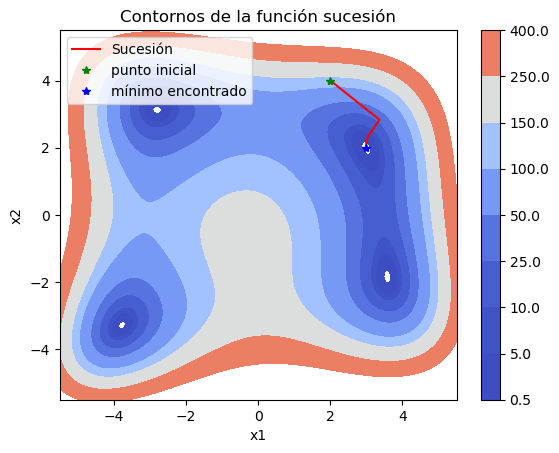

In [71]:
x0  = np.array([2,4])
n   = len(x0)
tau = np.sqrt(n* epsilon) 

xk, indicador, k,m = newton_hessian_modification(Himmelblau,D_Himmelblau,H_Himmelblau,x0,tau,delta,N,aini,rho,c1,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Himmelblau(xk))
print('||gk||   = ', np.linalg.norm(D_Himmelblau(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Himmelblau, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

**Función de Beale**

-Este algoritmo sí encuentra el mínimo a diferencia de los dos anteriores. Y además en menos de 900 iteraciones (menos que algoritmos de tareas anteriores)

It =  869
x_k       =  [3.00000001 0.5       ]
f(x_k)    =  3.4408941128126137e-17
||gk||   =  1.7942830277265875e-08
Sí se cumplio el criterio de convergencia


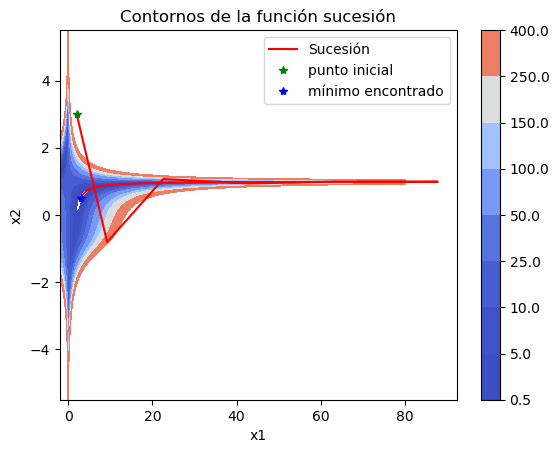

In [74]:
x0  = np.array([2,3])
n   = len(x0)
tau = np.sqrt(n*epsilon) 

xk, indicador, k,m = newton_hessian_modification(Beale,D_Beale,H_Beale,x0,tau,delta,N,aini,rho,c1,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Beale(xk))
print('||gk||   = ', np.linalg.norm(D_Beale(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Beale, sucesion,xleft=-2, xright=80, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

It =  15
x_k       =  [1. 1.]
f(x_k)    =  2.7235422752755433e-28
||gk||   =  3.251946148236627e-13
Sí se cumplio el criterio de convergencia


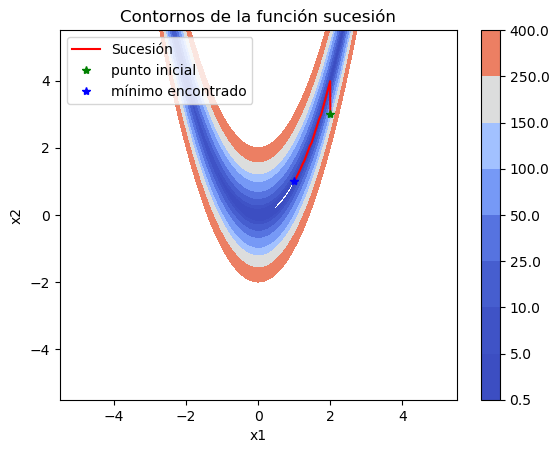

In [75]:
x0  = np.array([2,3])
n   = len(x0)
tau = np.sqrt(n*epsilon) 

xk, indicador, k,m = newton_hessian_modification(Rosenbrock,D_Rosenbrock,H_Rosenbrock,x0,tau,delta,N,aini,rho,c1,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Rosenbrock, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

In [76]:
x0  = np.array([-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0])
n   = len(x0)
tau = np.sqrt(n*epsilon) 

xk, indicador, k,m = newton_hessian_modification(Rosenbrock,D_Rosenbrock,H_Rosenbrock,x0,tau,delta,N,aini,rho,c1,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")

It =  26
x_k       =  [-0.99326337  0.99660604  0.99824061  0.99898843  0.99922615  0.99907365
  0.99845418  0.99705625  0.99417938  0.98839263]
f(x_k)    =  3.986579112347138
||gk||   =  8.176182051988461e-13
Sí se cumplio el criterio de convergencia


In [77]:
x0  = np.array([-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0])
n   = len(x0)
tau = np.sqrt(n*epsilon) 

xk, indicador, k,m = newton_hessian_modification(Rosenbrock,D_Rosenbrock,H_Rosenbrock,x0,tau,delta,N,aini,rho,c1,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")

It =  41
x_k       =  [-0.9932861   0.99665107  0.99833032  0.99916774  0.9995852   0.99979328
  0.99989698  0.99994866  0.99997441  0.99998724  0.99999363  0.99999679
  0.99999834  0.99999905  0.99999927  0.99999913  0.99999855  0.99999724
  0.99999453  0.99998905]
f(x_k)    =  3.986623854261197
||gk||   =  6.787076547890285e-12
Sí se cumplio el criterio de convergencia


**Función de Hartmann de dimensión 6**

In [82]:
x0  = np.array([0,0,0,0,0,0])
n   = len(x0)
tau = np.sqrt(n* epsilon) 

xk, indicador, k,m = newton_hessian_modification(Hartman,D_Hartman,H_Hartman,x0,tau,delta,1000,aini,rho,c1,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Hartman(xk))
print('||gk||   = ', np.linalg.norm(D_Hartman(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")

It =  999
x_k       =  [0.12198609 0.05700932 0.35367322 0.26755613 0.31659431 0.6632821 ]
f(x_k)    =  -2.1336325887490646
||gk||   =  1.7093287857386719


Vemos que el algoritmo de Newton con modificación de Hessiana sólo representa una mejora en el caso de la función de Beale. Con los primeros dos métodos la sucesión de puntos converge a un punto que no es el mínimo.

De acuerdo con lo obtenido para estas funciones, si se obtiene el mínimo de la función con alguno de los primeros dos métodos, está de más probar con la modificación de Hessiana. Sin embargo, si los dos primeros fallan, es buena idea probar con el tercero.